# Unemployment Rates vs. CPI and Covid19 Cases

In [1]:
# Dependencies and Setup
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import os
import csv

# Import the API key
from api_key import bls_api_key

# Get Unemployment Rates from the BLS Public Data API

* BLS is the Bureau of Labor Statistics
* The get API documentation = https://www.bls.gov/developers/home.htm
* You will need the Series ID to get the information which you can find from here = https://beta.bls.gov/dataQuery/find?st=0&r=20&more=0


In [2]:
# Retrieve Unemployment Rates by month between 2018 to 2022
# Series ID LNS14000000 is the (Seas) Unemployment Rate; Seas stands for Seasonally Adjusted
# Series ID LNU04000000 is the Unadjusted Unemployment Rate

# Below code only works for ONE SERIES ID as it only loads the underlying data without the series ID

headers = {'Content-Type': 'application/json'}

data = {"seriesid": ['LNS14000000'],
        "startyear": "2018",
        "endyear": "2022",
        "registrationKey": bls_api_key}

response = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/',
                         headers=headers, json=data)

if response.status_code == 200:
    unemployment_rates_time = response.json()
    print(unemployment_rates_time)
    #print(json.dumps(unemployment_rates_time, indent=4, sort_keys=True))
else:
    print("Error retrieving data")

{'status': 'REQUEST_SUCCEEDED', 'responseTime': 230, 'message': [], 'Results': {'series': [{'seriesID': 'LNS14000000', 'data': [{'year': '2022', 'period': 'M12', 'periodName': 'December', 'value': '3.5', 'footnotes': [{}]}, {'year': '2022', 'period': 'M11', 'periodName': 'November', 'value': '3.6', 'footnotes': [{}]}, {'year': '2022', 'period': 'M10', 'periodName': 'October', 'value': '3.7', 'footnotes': [{}]}, {'year': '2022', 'period': 'M09', 'periodName': 'September', 'value': '3.5', 'footnotes': [{}]}, {'year': '2022', 'period': 'M08', 'periodName': 'August', 'value': '3.7', 'footnotes': [{}]}, {'year': '2022', 'period': 'M07', 'periodName': 'July', 'value': '3.5', 'footnotes': [{}]}, {'year': '2022', 'period': 'M06', 'periodName': 'June', 'value': '3.6', 'footnotes': [{}]}, {'year': '2022', 'period': 'M05', 'periodName': 'May', 'value': '3.6', 'footnotes': [{}]}, {'year': '2022', 'period': 'M04', 'periodName': 'April', 'value': '3.6', 'footnotes': [{}]}, {'year': '2022', 'period':

In [3]:
# Put API results into a DataFrame
unemployment_rates_time_df =pd.DataFrame(unemployment_rates_time["Results"]["series"][0]["data"])

# Change the column names
unemployment_rates_time_df.columns = ["Year", "Period", "Month", "Unemployment Rate (Seas)", "Footnotes"]

# Drop Footnotes & Period columns since they are not needed / axis=1 to indicate dropping a column and not rows
unemployment_rates_time_df = unemployment_rates_time_df.drop(["Period", "Footnotes"], axis=1)

# Create a new column called Date by combining Month and Year. Date column must also be DateTime object type
unemployment_rates_time_df["Date"] = unemployment_rates_time_df["Month"].astype(str) + "-" + unemployment_rates_time_df["Year"].astype(str)
unemployment_rates_time_df["Date"] = pd.to_datetime(unemployment_rates_time_df["Date"]).dt.normalize()

# Convert Unemployment Rate from string to a number
unemployment_rates_time_df["Unemployment Rate (Seas)"] = unemployment_rates_time_df["Unemployment Rate (Seas)"].astype(float)

# Rearrange the columns so Date goes first and sort by ascending
unemployment_rates_time_df = unemployment_rates_time_df[["Date", "Month", "Year", "Unemployment Rate (Seas)"]]
unemployment_rates_time_df = unemployment_rates_time_df.sort_values("Date", ascending=True)

# Reset the index
unemployment_rates_time_df = unemployment_rates_time_df.reset_index(drop=True)

# Display the DataFrame
unemployment_rates_time_df.head()

,Date,Month,Year,Unemployment Rate (Seas)
0,2018-01-01,January,2018,4.0
1,2018-02-01,February,2018,4.1
2,2018-03-01,March,2018,4.0
3,2018-04-01,April,2018,4.0
4,2018-05-01,May,2018,3.8


In [4]:
# Check object types of the dataframe: Date should be datetime and Unemployment Rate should be float
print(unemployment_rates_time_df.dtypes)

Date                        datetime64[ns]
Month                               object
Year                                object
Unemployment Rate (Seas)           float64
dtype: object


In [5]:
# Save the DataFrame into a csv file, do not include index
unemployment_rates_time_df.to_csv("../output/Unemployment_by_Time.csv", index=False)


Create a line chart to show unemployment rates by time

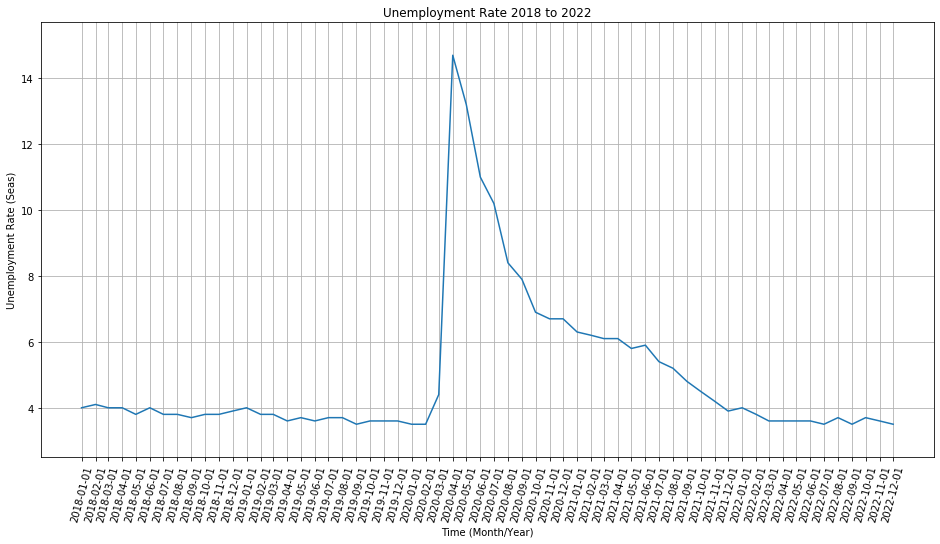

In [6]:
# Set the plot size
plt.figure(figsize=(16,8))

# Plot the line chart
plt.plot(unemployment_rates_time_df["Date"], unemployment_rates_time_df["Unemployment Rate (Seas)"])

# Incorporate the other graph properties
plt.xlabel("Time (Month/Year)")
plt.ylabel("Unemployment Rate (Seas)")
plt.title("Unemployment Rate 2018 to 2022")
plt.ylim(unemployment_rates_time_df["Unemployment Rate (Seas)"].min()-1, unemployment_rates_time_df["Unemployment Rate (Seas)"].max()+1)
plt.xticks(unemployment_rates_time_df["Date"], rotation=75)
plt.grid()

# Save the figure
plt.savefig("../output/Unemployment_by_Time.png", dpi=300)

# Show the line plot
plt.show()


# Additional data points

* Prove negative correlation between Unemployment Rate and CPI
    * CPI - Consumer Price Index is the rate of inflation or an indicator of rising prices in the U.S. Economy
    * Consumer Price Index for All Urban Consumers: All Items in U.S. City Average
    * https://fred.stlouisfed.org/series/CPIAUCSL
* Impact of Covid19 pandemic
    * Using data found on Kaggle.com, show if there is correlation how Covid19 cases in the US impacted unemployment rates
    * https://www.kaggle.com/datasets/antgoldbloom/covid19-data-from-john-hopkins-university?select=CONVENIENT_us_confirmed_cases.csv

CSV Download from the FRED for CPI

In [7]:
# Open the csv file and create a DataFrame
cpi_df = pd.read_csv("../resource/CPIAUCSL.csv")

# Rename the columns
cpi_df.columns = ["Date", "CPI"]

# Convert the Date into a DateTime format and CPI to float
cpi_df["Date"] = pd.to_datetime(cpi_df["Date"]).dt.normalize()
cpi_df["CPI"]  = cpi_df["CPI"].astype(float)

# Sort on Date and reset index
cpi_df = cpi_df.sort_values("Date", ascending=True)
cpi_df = cpi_df.reset_index(drop=True)

# Display the DataFrame
cpi_df.head()

,Date,CPI
0,2017-12-01,247.805
1,2018-01-01,248.743
2,2018-02-01,249.439
3,2018-03-01,249.581
4,2018-04-01,250.146


In [8]:
# Check the object types
cpi_df.dtypes

Date    datetime64[ns]
CPI            float64
dtype: object

Create line chart to show CPI by time

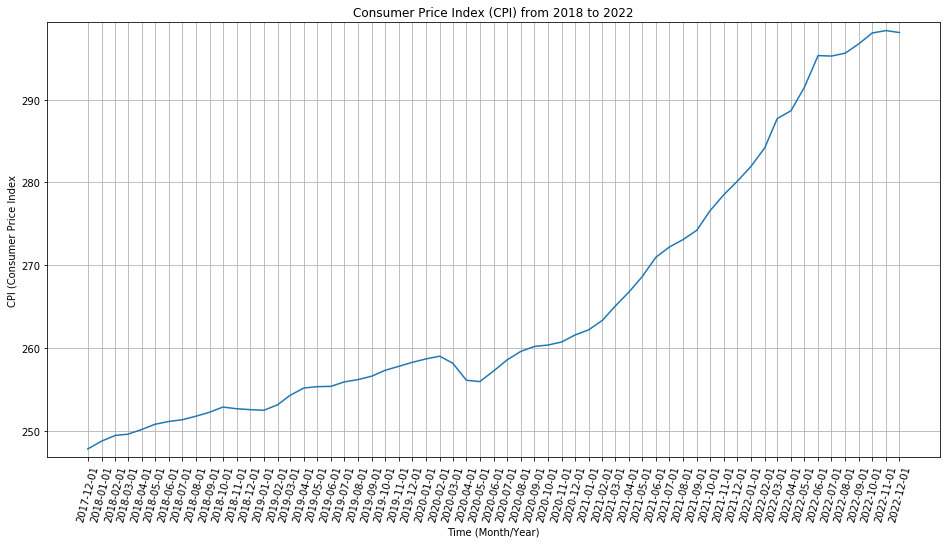

In [9]:
# Set the plot size
plt.figure(figsize=(16,8))

# Plot the line chart
plt.plot(cpi_df["Date"], cpi_df["CPI"])

# Incorporate the other graph properties
plt.xlabel("Time (Month/Year)")
plt.ylabel("CPI (Consumer Price Index")
plt.title("Consumer Price Index (CPI) from 2018 to 2022")
plt.ylim(cpi_df["CPI"].min()-1, cpi_df["CPI"].max()+1)
plt.xticks(cpi_df["Date"], rotation=75)
plt.grid()

# Save the figure
plt.savefig("../output/CPI_by_Time.png", dpi=300)

# Show the line plot
plt.show()

CSV Download from Kaggle.com on COVID19 Cases across the U.S.

In [10]:
# Open the csv file and create a DataFrame
covid19_df = pd.read_csv("../resource/CONVENIENT_us_confirmed_cases.csv")

# Drop the row that contains the county headers since we will be combining the data by State
covid19_df = covid19_df.drop(covid19_df.index[0])

# Rename the Province_State column to Time Period
covid19_df = covid19_df.rename(columns={"Province_State": "Time Period"})

# Convert the Covid19 cases into an integer or float type, and since we do not want to convert all the values, we need to exclude Time Period in the conversion
exclude = ["Time Period"]

# Convert all the data in the DataFrame, excluding the column(s) specified in exclude
covid19_df[covid19_df.columns.difference(exclude)] = covid19_df[covid19_df.columns.difference(exclude)].apply(pd.to_numeric, errors='coerce')

# For any values that did not convert (NaN value), replace with 0
covid19_df = covid19_df.fillna(0)

# Reset the index since we dropped a row earlier
covid19_df = covid19_df.reset_index(drop=True)

# Display the DataFrame
covid19_df.head()


/Users/angelanarag/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3186: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,2

,Time Period,Alabama,Alabama.1,Alabama.2,Alabama.3,Alabama.4,Alabama.5,Alabama.6,Alabama.7,Alabama.8,...,Wyoming.15,Wyoming.16,Wyoming.17,Wyoming.18,Wyoming.19,Wyoming.20,Wyoming.21,Wyoming.22,Wyoming.23,Wyoming.24
0,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/27/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Combine the State County Covid19 cases by State.

The Covid19 file shows the no. of Covid19 cases by day and by state counties. In order to match it up with the Unemployment Rates, we must combine the state county data into each state.

In [11]:
# To combine the state counties into each state, sum up the values in the columns, axis=1 to only sum per row
covid19_df["Alabama"] = covid19_df.iloc[:, 1:69].sum(axis=1)
covid19_df["Alaska"] = covid19_df.iloc[:, 70:101].sum(axis=1)
covid19_df["Arizona"] = covid19_df.iloc[:, 102:120].sum(axis=1)
covid19_df["Arkansas"] = covid19_df.iloc[:, 121:197].sum(axis=1)
covid19_df["California"] = covid19_df.iloc[:, 198:257].sum(axis=1)
covid19_df["Colorado"] = covid19_df.iloc[:, 258:323].sum(axis=1)
covid19_df["Connecticut"] = covid19_df.iloc[:, 324:333].sum(axis=1)
covid19_df["Delaware"] = covid19_df.iloc[:, 334:338].sum(axis=1)
covid19_df["District of Columbia"] = covid19_df.iloc[:, 340:342].sum(axis=1)
covid19_df["Florida"] = covid19_df.iloc[:, 343:411].sum(axis=1)
covid19_df["Georgia"] = covid19_df.iloc[:, 412:572].sum(axis=1)
covid19_df["Hawaii"] = covid19_df.iloc[:, 575:581].sum(axis=1)
covid19_df["Idaho"] = covid19_df.iloc[:, 582:627].sum(axis=1)
covid19_df["Illinois"] = covid19_df.iloc[:, 628:731].sum(axis=1)
covid19_df["Indiana"] = covid19_df.iloc[:, 732:825].sum(axis=1)
covid19_df["Iowa"] = covid19_df.iloc[:, 826:926].sum(axis=1)
covid19_df["Kansas"] = covid19_df.iloc[:, 927:1033].sum(axis=1)
covid19_df["Kentucky"] = covid19_df.iloc[:, 1034:1155].sum(axis=1)
covid19_df["Louisiana"] = covid19_df.iloc[:, 1156:1221].sum(axis=1)
covid19_df["Maine"] = covid19_df.iloc[:, 1222:1239].sum(axis=1)
covid19_df["Maryland"] = covid19_df.iloc[:, 1240:1265].sum(axis=1)
covid19_df["Massachusetts"] = covid19_df.iloc[:, 1266:1282].sum(axis=1)
covid19_df["Michigan"] = covid19_df.iloc[:, 1283:1369].sum(axis=1)
covid19_df["Minnesota"] = covid19_df.iloc[:, 1370:1458].sum(axis=1)
covid19_df["Mississippi"] = covid19_df.iloc[:, 1459:1542].sum(axis=1)
covid19_df["Missouri"] = covid19_df.iloc[:, 1543:1660].sum(axis=1)
covid19_df["Montana"] = covid19_df.iloc[:, 1661:1718].sum(axis=1)
covid19_df["Nebraska"] = covid19_df.iloc[:, 1719:1813].sum(axis=1)
covid19_df["Nevada"] = covid19_df.iloc[:, 1814:1832].sum(axis=1)
covid19_df["New Hampshire"] = covid19_df.iloc[:, 1833:1844].sum(axis=1)
covid19_df["New Jersey"] = covid19_df.iloc[:, 1845:1867].sum(axis=1)
covid19_df["New Mexico"] = covid19_df.iloc[:, 1868:1902].sum(axis=1)
covid19_df["New York"] = covid19_df.iloc[:, 1903:1966].sum(axis=1)
covid19_df["North Carolina"] = covid19_df.iloc[:, 1967:2068].sum(axis=1)
covid19_df["North Dakota"] = covid19_df.iloc[:, 2069:2123].sum(axis=1)
covid19_df["Ohio"] = covid19_df.iloc[:, 2125:2214].sum(axis=1)
covid19_df["Oklahoma"] = covid19_df.iloc[:, 2215:2293].sum(axis=1)
covid19_df["Oregon"] = covid19_df.iloc[:, 2294:2331].sum(axis=1)
covid19_df["Pennsylvania"] = covid19_df.iloc[:, 2332:2400].sum(axis=1)
covid19_df["Puerto Rico"] = covid19_df.iloc[:, 2401:2480].sum(axis=1)
covid19_df["Rhode Island"] = covid19_df.iloc[:, 2481:2487].sum(axis=1)
covid19_df["South Carolina"] = covid19_df.iloc[:, 2488:2535].sum(axis=1)
covid19_df["South Dakota"] = covid19_df.iloc[:, 2536:2603].sum(axis=1)
covid19_df["Tennessee"] = covid19_df.iloc[:, 2604:2700].sum(axis=1)
covid19_df["Texas"] = covid19_df.iloc[:, 2701:2956].sum(axis=1)
covid19_df["Utah"] = covid19_df.iloc[:, 2957:2993].sum(axis=1)
covid19_df["Vermont"] = covid19_df.iloc[:, 2994:3009].sum(axis=1)
covid19_df["Virginia"] = covid19_df.iloc[:, 3011:3145].sum(axis=1)
covid19_df["Washington"] = covid19_df.iloc[:, 3146:3186].sum(axis=1)
covid19_df["West Virginia"] = covid19_df.iloc[:, 3187:3243].sum(axis=1)
covid19_df["Wisconsin"] = covid19_df.iloc[:, 3244:3317].sum(axis=1)
covid19_df["Wyoming"] = covid19_df.iloc[:, 3318:3342].sum(axis=1)
covid19_df["Total"] = covid19_df.iloc[:, 1:3342].sum(axis=1)


# Create a new column for Year and Month by converting the date column
covid19_df["Time Period"] = pd.to_datetime(covid19_df["Time Period"])
covid19_df["Month"] = covid19_df["Time Period"].dt.month
covid19_df["Year"] = covid19_df["Time Period"].dt.year
covid19_df["Month/Year"] = covid19_df["Month"].astype(str) + "-" + covid19_df["Year"].astype(str)
covid19_df["Date"] = pd.to_datetime(covid19_df["Month/Year"]).dt.normalize()

# Display the DataFrame
covid19_df.head()



,Time Period,Alabama,Alabama.1,Alabama.2,Alabama.3,Alabama.4,Alabama.5,Alabama.6,Alabama.7,Alabama.8,...,Wyoming.20,Wyoming.21,Wyoming.22,Wyoming.23,Wyoming.24,Total,Month,Year,Month/Year,Date
0,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,2020,1-2020,2020-01-01
1,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1,2020,1-2020,2020-01-01
2,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,2020,1-2020,2020-01-01
3,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,1,2020,1-2020,2020-01-01
4,2020-01-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,2020,1-2020,2020-01-01


In [12]:
# Create a new Data Frame with the updated data
new_covid19_df = covid19_df[["Date",
                            "Month/Year",
                            "Alabama", 
                            "Alaska",
                            "American Samoa", 
                            "Arizona", 
                            "Arkansas", 
                            "California", 
                            "Colorado", 
                            "Connecticut", 
                            "Delaware",
                            "Diamond Princess", 
                            "District of Columbia",
                            "Florida",
                            "Georgia",
                            "Grand Princess",
                            "Guam",
                            "Hawaii",
                            "Idaho",
                            "Illinois",
                            "Indiana",
                            "Iowa",
                            "Kansas",
                            "Kentucky",
                            "Louisiana",
                            "Maine",
                            "Maryland",
                            "Massachusetts",
                            "Michigan",
                            "Minnesota",
                            "Mississippi",
                            "Missouri",
                            "Montana",
                            "Nebraska",
                            "Nevada",
                            "New Hampshire",
                            "New Jersey",
                            "New Mexico",
                            "New York",
                            "North Carolina",
                            "North Dakota",
                            "Northern Mariana Islands",
                            "Ohio",
                            "Oklahoma",
                            "Oregon",
                            "Pennsylvania",
                            "Puerto Rico",
                            "Rhode Island",
                            "South Carolina",
                            "South Dakota",
                            "Tennessee",
                            "Texas",
                            "Utah",
                            "Vermont",
                            "Virgin Islands",
                            "Virginia",
                            "Washington",
                            "West Virginia",
                            "Wisconsin",
                            "Wyoming",
                            "Total"
                            ]]

# Sort on Date and reset index
new_covid19_df = new_covid19_df.sort_values("Date", ascending=True)
new_covid19_df = new_covid19_df.reset_index(drop=True)

# Save the DataFrame into a csv file, do not include index
new_covid19_df.to_csv("../output/new_covid19.csv", index=False)

# Display results
new_covid19_df.head()

,Date,Month/Year,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,...,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Total
0,2020-01-01,1-2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-01,1-2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,2020-01-01,1-2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-01,1-2020,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,2020-01-01,1-2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Combine the Covid19 Cases for each State by Date

In [13]:
# In order to combine monthly Covid19 cases, use the groupby() function
# Sum the Covid19 cases by Date
aggregated = new_covid19_df.groupby("Month/Year").sum()
aggregated = aggregated.reset_index()
 
# Convert into DataFrame before summing up into each State
aggregated_df = pd.DataFrame(aggregated)

# Recreate the date column, insert it in position 1 and sort data by Date
month_year = aggregated_df["Month/Year"]
aggregated_df.insert(1,"Date", month_year)
aggregated_df["Date"] = pd.to_datetime(aggregated_df["Month/Year"]).dt.normalize()
aggregated_df = aggregated_df.sort_values("Date", ascending=True)

# Save the aggregated data into a new file
aggregated_df.to_csv("../output/Aggregated_Covid19.csv", index=False)

# Display results
aggregated_df.head()


,Month/Year,Date,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,...,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Total
0,1-2020,2020-01-01,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
13,2-2020,2020-02-01,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,35.0
17,3-2020,2020-03-01,1061.0,128.0,0.0,1280.0,523.0,7993.0,2964.0,3117.0,...,3809.0,847.0,275.0,30.0,1235.0,5264.0,162.0,1410.0,109.0,378228.0
20,4-2020,2020-04-01,6112.0,231.0,0.0,6290.0,2755.0,42691.0,16792.0,24397.0,...,19634.0,3667.0,551.0,36.0,14566.0,7928.0,962.0,5442.0,450.0,1744078.0
23,5-2020,2020-05-01,10941.0,124.0,0.0,11261.0,3834.0,63142.0,9218.0,14303.0,...,30250.0,4985.0,104.0,3.0,28732.0,4918.0,883.0,11541.0,343.0,1389120.0


In [14]:
# take the max and min Covid19 Cases
max_cases = aggregated_df["Total"].max()
min_cases = aggregated_df["Total"].min()

print(f"Max # of Cases: {max_cases}")
print(f"Min # of Cases: {min_cases}")

Max # of Cases: 39913804.0
Min # of Cases: 14.0


Create a line chart to show Covid19 case by Date

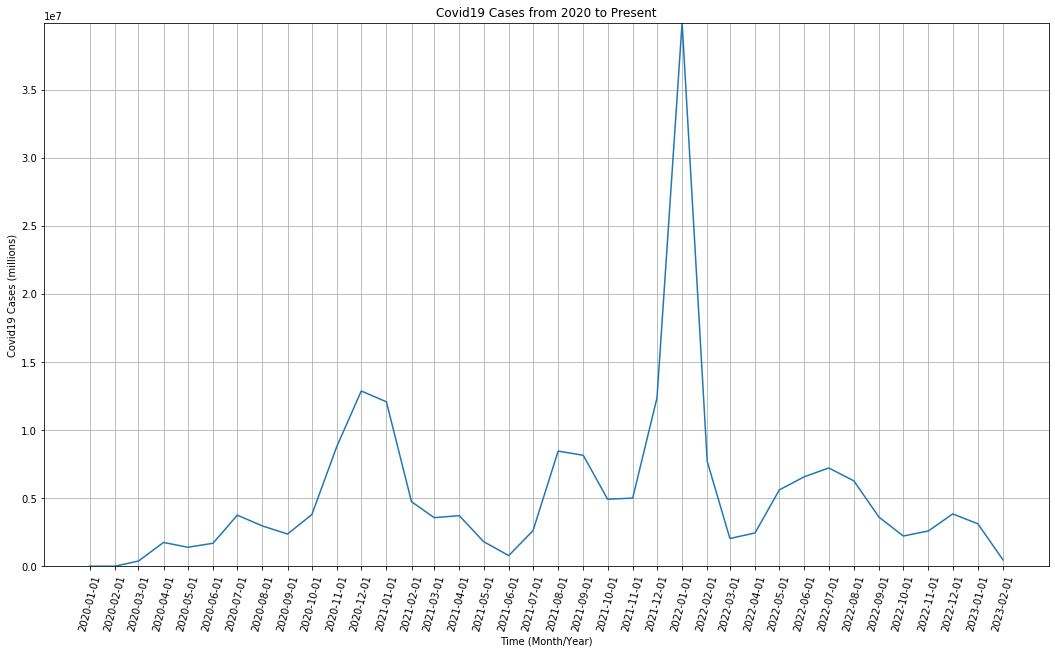

In [15]:

# Set the plot size
plt.figure(figsize=(18,10))

# Plot the line chart
plt.plot(aggregated_df["Date"], aggregated_df["Total"])

# Incorporate the other graph properties
plt.xlabel("Time (Month/Year)")
plt.ylabel("Covid19 Cases (millions)")
plt.title("Covid19 Cases from 2020 to Present")
plt.ylim(0, aggregated_df["Total"].max())
plt.xticks(aggregated_df["Date"], rotation=75)
#plt.xticks(aggregated_cases_df["Date"].dt.strftime('%m/%Y'), rotation=75)
plt.grid()

# Save the figure
plt.savefig("../output/Covid19_by_Time.png", dpi=300)

# Show the line plot
plt.show()

# Merge the Unemployment Rates with CPI and Covid19 Case data

Merge CPI data with the Unemployment Rates on Date

In [16]:
# Merge the unemployment_rates_time_df with cpi_df
merged_unemployment_cpi_df = pd.merge(unemployment_rates_time_df, cpi_df, on=["Date", "Date"], how="left")
# Save the merged data into a new file
merged_unemployment_cpi_df.to_csv("../output/Merged_Unemployment_CPI.csv", index=False)
# Display results of merge
merged_unemployment_cpi_df.head()

,Date,Month,Year,Unemployment Rate (Seas),CPI
0,2018-01-01,January,2018,4.0,248.743
1,2018-02-01,February,2018,4.1,249.439
2,2018-03-01,March,2018,4.0,249.581
3,2018-04-01,April,2018,4.0,250.146
4,2018-05-01,May,2018,3.8,250.779


Merge Covid19 Cases with Unemployment Rates on Date

In [17]:
# Merge two the unemployment_rates_time_df and the aggregated_df DataFrames
merged_unemployment_covid19_df = pd.merge(merged_unemployment_cpi_df, aggregated_df, on="Date", how="left")
# For any values that did not convert (NaN value), replace with 0
merged_unemployment_covid19_df = merged_unemployment_covid19_df.fillna(0)
# Drop 
merged_unemployment_covid19_df = merged_unemployment_covid19_df.drop("Month/Year", axis=1)
# Save the merged data into a new file
merged_unemployment_covid19_df.to_csv("../output/merged_unemployment_covid19.csv", index=False)
# Display results of merge
merged_unemployment_covid19_df.head()

,Date,Month,Year,Unemployment Rate (Seas),CPI,Alabama,Alaska,American Samoa,Arizona,Arkansas,...,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Total
0,2018-01-01,January,2018,4.0,248.743,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-02-01,February,2018,4.1,249.439,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-03-01,March,2018,4.0,249.581,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-04-01,April,2018,4.0,250.146,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-05-01,May,2018,3.8,250.779,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Still working on the below chart to show correlation Unemployment Rates vs Covid19 Cases.  NOT WORKING YET

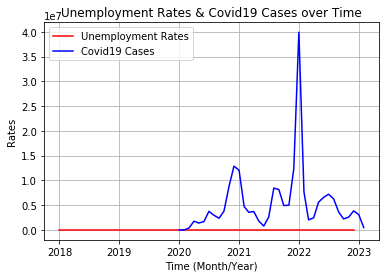

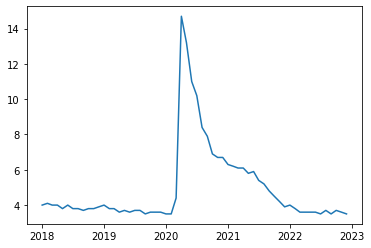

In [18]:


# Plot the charts and apply some styling
unemployment, = plt.plot(unemployment_rates_time_df["Date"], unemployment_rates_time_df["Unemployment Rate (Seas)"], color="red", label="Unemployment Rates")
covid19, = plt.plot(aggregated_df["Date"], aggregated_df["Total"], color="blue", label="Covid19 Cases")

# # Add labels to X and Y axes :: Add title
plt.title("Unemployment Rates & Covid19 Cases over Time")
plt.xlabel("Time (Month/Year)")
plt.ylabel("Rates")

# # Set the limits for the X and Y axes
#plt.xlim(0, 120)
#plt.ylim(5, 95)

# # Create a legend for the chart
plt.legend(handles=[unemployment, covid19], loc="best")

# # Add in a grid for the chart
plt.grid()


plt.show()

# Plot the line chart
plt.plot(unemployment_rates_time_df["Date"], unemployment_rates_time_df["Unemployment Rate (Seas)"])